### Importazione librerie

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle


In [127]:
file_path = "../../train.csv"
df = pd.read_csv(file_path)

### Controllo ed eliminazione valori nulli e duplicati

In [128]:
print("\nValori mancanti nel DataFrame:")
print(df.isnull().sum())


Valori mancanti nel DataFrame:
Year    0
S0      0
S1      0
S2      0
S3      0
       ..
S85     0
S86     0
S87     0
S88     0
S89     0
Length: 91, dtype: int64


In [129]:
# Gestione dei duplicati
print("\nDuplicati nel DataFrame:")
print(df.duplicated().sum())


Duplicati nel DataFrame:
52


In [130]:
clean_df = df.dropna() 
clean_df = df.drop_duplicates()

# Data Visualization

### Distribuzione delle canzoni per anno di pubblicazione 


Distribuzione delle canzoni per anno di pubblicazione:
Year
1956      283
1957      299
1958      291
1959      296
1960      212
1961      285
1962      302
1963      451
1964      473
1965      560
1966      689
1967      859
1968      934
1969     1105
1970     1174
1971     1065
1972     1142
1973     1298
1974     1092
1975     1240
1976     1089
1977     1250
1978     1463
1979     1554
1980     1550
1981     1581
1982     1798
1983     1692
1984     1684
1985     1789
1986     2110
1987     2561
1988     2805
1989     3333
1990     3628
1991     4322
1992     4770
1993     5263
1994     6061
1995     6626
1996     7063
1997     7590
1998     7905
1999     9119
2000     9638
2001    10793
2002    11724
2003    13689
2004    14802
2005    17472
2006    18764
2007    19697
2008    17376
2009    15512
Name: count, dtype: int64


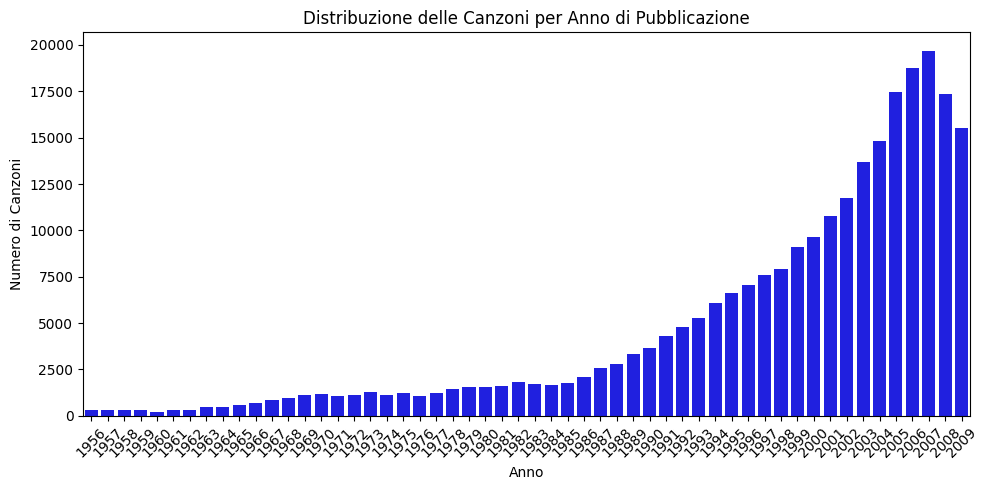

In [131]:
# Calcola la frequenza di canzoni per anno
year_distribution = clean_df['Year'].value_counts().sort_index()

# Stampa i risultati per verifica
print("\nDistribuzione delle canzoni per anno di pubblicazione:")
print(year_distribution)

# Creazione del grafico
plt.figure(figsize=(10, 5))  # Dimensione del grafico più compatta
sns.barplot(x=year_distribution.index, y=year_distribution.values, color='blue')  # Usa un colore semplice
plt.title('Distribuzione delle Canzoni per Anno di Pubblicazione')
plt.xlabel('Anno')
plt.ylabel('Numero di Canzoni')
plt.xticks(rotation=45)  # Ruota le etichette dell'asse x se necessario
plt.tight_layout()  # Adatta il layout

# Mostra il grafico
plt.show()

### Calcolo outliers --> QUESTO NON SO ANCORA DI PRECISO SOTTO COSA METTERLO, PRIMA VA FATTA LA DATA VISUALIZATION

In [ ]:
# Seleziona solo le colonne che iniziano con 'S'
colonne_s = [col for col in clean_df.columns if col.startswith('S')]

# Lista per memorizzare i risultati
risultati_outliers = []

# Ciclo attraverso ogni colonna 'S'
for col in colonne_s:
    # Calcola i quantili e l'IQR (Interquartile Range)
    q1 = clean_df[col].quantile(0.25)
    q3 = clean_df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calcola i baffi inferiori e superiori
    baffo_inferiore = q1 - 1.5 * iqr
    baffo_superiore = q3 + 1.5 * iqr
    
    # Trova gli outliers inferiori e superiori
    outliers_inferiori = clean_df[clean_df[col] < baffo_inferiore]
    outliers_superiori = clean_df[clean_df[col] > baffo_superiore]
    numero_outliers = len(outliers_inferiori) + len(outliers_superiori)
    
    # Aggiungi i risultati alla lista
    risultati_outliers.append({
        'Colonna': col,
        'Numero_Outliers': numero_outliers
    })

# Converti i risultati in un clean_df e stampalo
clean_df_outliers = pd.DataFrame(risultati_outliers)
print(clean_df_outliers)

   Colonna  Numero_Outliers
0       S0             5306
1       S1             7313
2       S2             7484
3       S3            11229
4       S4             5224
..     ...              ...
85     S85            16608
86     S86            15876
87     S87            14794
88     S88            19031
89     S89            19330

[90 rows x 2 columns]
